<a href="https://colab.research.google.com/github/lucas-ye/IA/blob/main/keras_penguins_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">


# Lab Keras

Neste exercício você vai empregar modelos Sequenciais do `Keras` para resolver o problema de classificação da base de dados `penguins`. Siga os passos e, a seguir, responda o questionário no Moodle. Vamos buscar prever com modelos de redes profundas a ilha de um pinguim com base nos demais atributos. 

Acesse [aqui](https://keras.io/) a documentação do `Keras`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dados

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Dropna

Verifique e exclua os dados ausentes.

In [3]:
df = df.dropna().reset_index(drop=True)
print(df.isnull().sum())
df.head()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# Transformações

O `Keras` possui várias funções de transformação como HotEncode e Normalização, mas aqui vamos seguir empregando as funções que você já conhece do `scikit-learn`.

# Hot Encode

Faça o hot enconde de `species` e `island` empregando:

```
from sklearn.preprocessing import OneHotEncoder
```

In [4]:
# seu código
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['species', 'island']])
transformed = hot_encode.transform(df[['species', 'island']]).toarray()
# print(transformed)

transformed_df = pd.DataFrame(transformed, columns=hot_encode.get_feature_names_out())
display(transformed_df.head())

df = pd.concat([df, transformed_df],axis=1) 
df.head()


,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0,0.0,0.0,1.0


# Label Encode

Faça o Label Encode de `sex` empregando

```
from sklearn.preprocessing import LabelEncoder
```

Ele é semelhante ao `OneHotEncode`. Consulte a documentação se precisar.  

In [5]:
# seu código
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

LabelEncode = LabelEncoder()
LabelEncode = LabelEncode.fit(df['sex'])
labels = LabelEncode.transform(df['sex'])

df_labels = pd.DataFrame(labels, columns=['sex_label'])

df = pd.concat([df, df_labels], axis=1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0,0.0,0.0,1.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0,0.0,0.0,1.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0,0.0,0.0,1.0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0,0.0,0.0,1.0,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0,0.0,0.0,1.0,1


# Normalização

Empregue:

```
from sklearn.preprocessing import StandardScaler
```

Para fazer a normalização dos dados:

```
['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'species_Adelie',
       'species_Chinstrap', 'sex']
```

**Note**, fizemos a normalização eliminando uma das espécies. **Por que?**

Não empregaremos `body_mass_g` nem `island` que são atributos objetivo das seções seguintes. O nome dos atributos ainda pode diferir de acordo com as transformações anteriores que você fez.

In [35]:
# seu código

from sklearn.preprocessing import StandardScaler

# Entradas e Saídas
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'sex_label']]
y = df[['island_Biscoe', 'island_Dream', 'island_Torgersen']]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [47]:
print(X.shape)
X.sum()


(333, 7)


4.831690603168681e-13

# Classificação

Aqui vamos empregar redes neurais profundas para fazer a classificação da Ilha dos Penguins com base nos demais dados.

## Separando os dados de Treinamento e Teste

Empregue `random_state=1`, e 0.3 de dados de teste estratificados por y.

In [37]:
# seu código

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(y_train.shape)


(233, 3)


# Configuração e Treinamento da Rede Deep Learning

Empregue o template abaixo para criar 3 diferentes modelos de redes profundas. Faça mais de uma execução (3 ou mais) até os resultados estarem consistentes (o melhor modelo persistindo na maior parte das vezes). Descarte resultados abaixo de 50%.

* Modelo 1
> Somente com as camadas de entrada e saída. Empregue as funções `relu` e `softmax` respectivamente para as camadas de entrada e saída.

* Modelo 2
> Empregue as funções `relu` e `softmax` respectivamente para as camadas de entrada e saída. Empregue ainda 2 camadas ocultas de 64 elementos e função `relu`. 

* Modelo 3
> **Pesquise para implementar!** O que é e como criar uma camada de `Dropout`? Empregue o modelo anterior adionando uma camada de `Dropout` de 10% após cada camada oculta.

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report  

In [39]:
print("TF Version: ", tf.__version__)
print("GPU available: ", tf.config.list_physical_devices('GPU')) # havendo disponibilidade o modelo executa empregando GPU

TF Version:  2.9.2
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [40]:
#@markdown `plot_loss_acc(history,more_title='')`
def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc

## Modelo 1

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 7)                 56        
                                                                 
 dense_129 (Dense)           (None, 3)                 24        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5373692512512207

Test accuracy: 0.6499999761581421


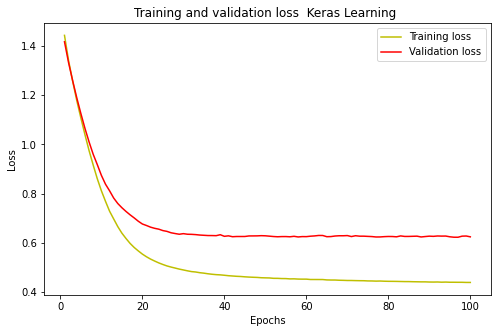

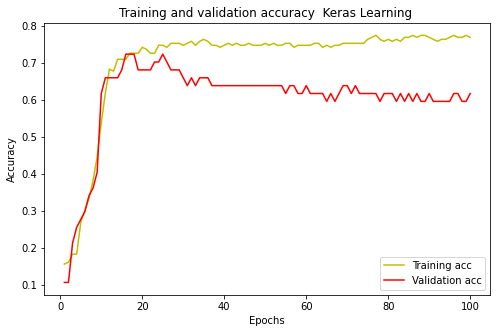

 Keras Learning Accuracy Train: 76.88 %, Accuracy Test: 61.70 %


In [72]:
# seu código 

# Neural net config
model = Sequential([layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1],])])  # input layer

# hidden layers 

model.add(layers.Dense(y_train.shape[1], activation='softmax')) # output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=0)

# Show results
model.summary()

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

loss, val_loss, acc, val_acc = plot_loss_acc(history,' Keras Learning ')

# save model
model1 = model

# Modelo 2


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 7)                 56        
                                                                 
 dense_131 (Dense)           (None, 64)                512       
                                                                 
 dense_132 (Dense)           (None, 64)                4160      
                                                                 
 dense_133 (Dense)           (None, 3)                 195       
                                                                 
Total params: 4,923
Trainable params: 4,923
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5603405833244324

Test accuracy: 0.6800000071525574


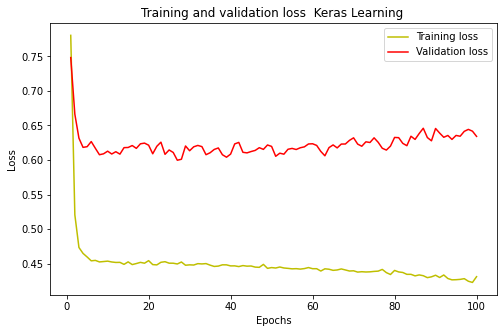

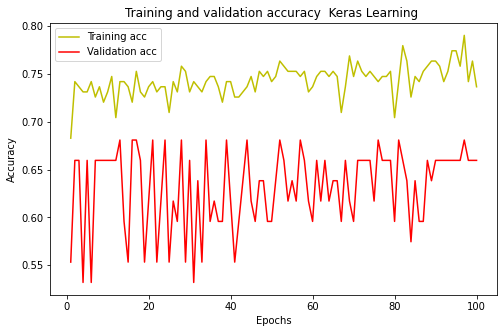

 Keras Learning Accuracy Train: 73.66 %, Accuracy Test: 65.96 %


In [73]:
# seu código 

# Neural net config
model2 = Sequential([layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1],])])  # input layer

# hidden layers 
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(y_train.shape[1], activation='softmax')) # output layer

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
# history = model2.fit(X_train, y_train, validation_split=0.2, epochs=100)
history = model2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=0)

# Show results
model2.summary()

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

loss, val_loss, acc, val_acc = plot_loss_acc(history,' Keras Learning ')

# save model2
model2 = model2

# Modelo 3

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 7)                 56        
                                                                 
 dense_143 (Dense)           (None, 64)                512       
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_144 (Dense)           (None, 64)                4160      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_145 (Dense)           (None, 3)                 195       
                                                                 
Total params: 4,923
Trainable params: 4,923
Non-train

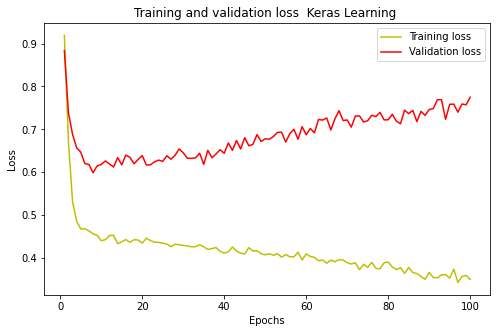

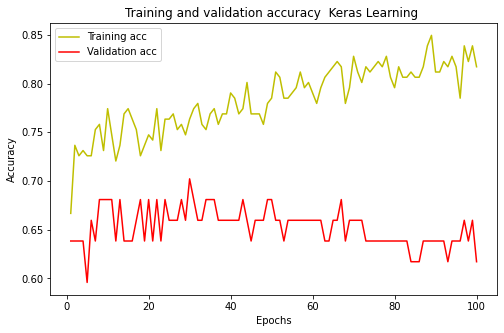

 Keras Learning Accuracy Train: 81.72 %, Accuracy Test: 61.70 %


In [76]:
# seu código
from tensorflow.keras.layers import Dropout
# seu código 

# Neural net config
model3 = Sequential([layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1],])])  # input layer

# hidden layers 
model3.add(layers.Dense(64, activation='relu'))
model3.add(Dropout(0.1))
model3.add(layers.Dense(64, activation='relu'))
model3.add(Dropout(0.1))
model3.add(layers.Dense(y_train.shape[1], activation='softmax')) # output layer

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
# history = model3.fit(X_train, y_train, validation_split=0.2, epochs=100)
history = model3.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=0)

# Show results
model3.summary()

score = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

loss, val_loss, acc, val_acc = plot_loss_acc(history,' Keras Learning ')

# save model3
model3 = model3

### Summarize all results

In [77]:
print( 'Score Accuracy Test Model 1: ' , model1.evaluate(X_test, y_test, verbose=0)[1] )
print( 'Score Accuracy Test Model 2: ' , model2.evaluate(X_test, y_test, verbose=0)[1] )
print( 'Score Accuracy Test Model 3: ' , model3.evaluate(X_test, y_test, verbose=0)[1] )

Score Accuracy Test Model 1:  0.6499999761581421
Score Accuracy Test Model 2:  0.6800000071525574
Score Accuracy Test Model 3:  0.6899999976158142


# Predição `X_test`

Empregue o melhor dos 3 modelos e construa a matriz de confusão (`confusion_matrix`) sobre o conjunto de teste.

In [ ]:
# seu código

# Predição de um novo caso

Empregue o melhor dos 3 modelos. Faça a predição de um pinguim modelo da espécie `Gentoo` do sexo masculino. Os demais valores são os valores médios da coleção toda. Faça a predição da ilha de origem do pinguim modelo.

In [82]:
# seu código
from sklearn.metrics import confusion_matrix
filtrado = df[df['species'] == 'Gentoo']
filtrado =  filtrado[filtrado['sex'] == 'Male']
filtrado['island'].value_counts()
y_pred = np.argmax(model.predict(X_test), axis=-1)
    
print(confusion_matrix(np.argmax(y_test.to_numpy(), axis=-1),y_pred))

4/4 [==============================] - 0s 3ms/step
[[36  6  1]
 [11 28  0]
 [10  7  1]]


In [ ]:
from sklearn.preprocessing import StandardScaler

# seu código



In [ ]:
# seu código